# Literature Analyses

Words, words, words.

In [29]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [12]:
# import seaborn as sns
# sns.set_context('poster')

## Functions

In [110]:
def plot_hist(df, column, figsize=(3, 3)):
    """Helper function to plot a histogram of data."""
    
    # Settings
    color = None
    shrink = 0.8
    
    plt.figure(figsize=figsize)
    hist = sns.histplot(df, x=column, shrink=shrink, color=color)
    hist.set_xticks(hist.get_xticks())  
    hist.set_xticklabels(hist.get_xticklabels(), rotation=45, ha='right');

## Load the Data

In [111]:
# Set the file name
file_name = 'apc_data.csv'

In [98]:
# Load the data
df = pd.read_csv(file_name, skiprows=[0])

In [101]:
# Check the columns
df.columns

Index(['Disorder', 'Authors', 'Year', 'Month', 'DOI', 'Title', 'Journal',
       'Data', 'Analyzed Data', 'Amount of Data', 'Design', 'Analysis',
       '# Patients', 'Patient Ages', '# Control', 'Control Ages', 'Fit Method',
       'Fit Range', 'Settings Reporting', 'Report GOF', 'Clinical EXP',
       'Control EXP', 'Reported Finding', 'Report Effects Size',
       'Effect Size Measure', 'Effects Size', 'Biomarker', 'Interpretation',
       'Notes'],
      dtype='object')

#### Clean up the loaded data

In [102]:
# Drop the null rows
df = df.dropna()

In [103]:
df.head()

,Disorder,Authors,Year,Month,DOI,Title,Journal,Data,Analyzed Data,Amount of Data,...,Report GOF,Clinical EXP,Control EXP,Reported Finding,Report Effects Size,Effect Size Measure,Effects Size,Biomarker,Interpretation,Notes
1,ADHD,Robertson et al,2019,10,10.1152/jn.00388.2019,EEG Power Spectral Slope differs by ADHD statu...,Journal of Neurophysiology,EEG,resting,7m,...,no,1.67 +/- 0.27,1.51 +/- 0.32,⬆︎ exponent in clinical group,yes,eta-squared,0.088,yes,E/I ratio,Are multiple datasets / subsets included and a...
2,ADHD,Pertermann et al,2019,8,10.1016/j.bpsc.2019.03.011,The Modulation of Neural Noise Underlies the E...,Biological Psychiatry: Cognitive Neuroscience ...,EEG,task,1s,...,-,unclear,unclear,⬇︎ exponent in clinical group ⬆︎ exponent with...,no,-,-,no,neural noise,Measurement is a little unclear - is a “neural...
3,ADHD,Ostlund et al,2021,4,10.1016/j.dcn.2021.100931,Behavioral and cognitive correlates of the ape...,Developmental Cognitive Neuroscience,EEG,resting,8m,...,no,unclear,unclear,⬇︎ exponent in clinical group,no,-,-,no,E/I ratio,Also relate exponent measures to reaction time...
4,ADHD,Arnett et al,2022,5,10.3389/fnbeh.2022.887622,Neural Markers of Methylphenidate Response in ...,Frontiers in Behavioral Neuroscience,EEG,video,2m,...,no,unclear,unclear,⬇︎ exponent in clinical group (drug non-respon...,no,-,-,yes,oscillations,ADHD subjects are split into medicated and unm...
5,ADHD,Arnett et al,2022,12,10.1111/jcpp.13645,Absence of dynamic neural oscillatory response...,The Journal of Child Psychology and Psychiatry,EEG,video,3m,...,no,unclear,unclear,⬇︎ exponent in clinical group (condition speci...,no,-,-,yes,integration,Also compare between medicated (n=56) vs unmed...


In [116]:
df['Data'].values

array(['EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG',
       'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'MEG', 'EEG', 'EEG', 'EEG',
       'EEG', 'MEG', 'EEG', 'EEG', 'EEG', 'EEG', 'MEG', 'EEG',
       'EEG\u2028MEG', 'MEG', 'EEG', 'EEG', 'EEG', 'MEG', 'DBS', 'DBS',
       'EEG', 'DBS', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG',
       'EEG', 'EEG', 'EEG', 'EEG', 'iEEG', 'iEEG', 'iEEG', 'iEEG', 'iEEG',
       'MEG', 'EEG', 'EEG', 'iEEG', 'MEG', 'MEG', 'RNS', 'EEG', 'EEG',
       'DBS', 'RNS', 'EEG', 'iEEG\u2028MEG', 'EEG', 'EEG', 'DBS', 'DBS',
       'EEG', 'MEG', 'DBS', 'EEG', 'EEG', 'EEG', 'DBS', 'DBS', 'EEG',
       'MEG', 'EEG', 'EEG', 'MEG', 'DBS', 'DBS', 'MEG', 'DBS', 'DBS',
       'EEG', 'DBS', 'DBS', 'MEG', 'MEG', 'EEG', 'EEG', 'EEG', 'EEG',
       'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG',
       'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG',
       'EEG', 'EEG', 'MEG', 'MEG', 'EEG', 'EEG', 'EEG', 'EEG', 'MEG',
       'EEG', 'D

In [104]:
years = np.array(df['Year'].values).astype('int')

In [105]:
years

array([2019, 2019, 2021, 2022, 2022, 2022, 2022, 2022, 2024, 2024, 2024,
       2024, 2024, 2022, 2022, 2022, 2023, 2023, 2023, 2024, 2024, 2024,
       2024, 2014, 2022, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2019,
       2022, 2023, 2023, 2023, 2023, 2023, 2021, 2021, 2023, 2023, 2023,
       2024, 2024, 1994, 2013, 2014, 2015, 2015, 2021, 2021, 2022, 2022,
       2022, 2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024,
       2024, 2024, 2018, 2019, 2020, 2021, 2022, 2022, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024,
       2024, 2024, 2024, 2024, 2020, 2021, 2023, 2023, 2023, 2024, 2024,
       2020, 2021, 2022, 2024, 2022, 2022, 2024, 2021, 2022, 2019, 2024,
       2021, 2024, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2020, 2023, 2024, 2021, 2021, 2024, 2017, 2021, 2022, 2023, 2024,
       2021, 2021])

In [106]:
year_counts = Counter(years)
year_counts

Counter({2019: 5,
         2021: 15,
         2022: 21,
         2024: 39,
         2023: 42,
         2014: 2,
         1994: 1,
         2013: 1,
         2015: 2,
         2018: 1,
         2020: 4,
         2017: 1})

In [107]:
fit_methods = Counter(df['Fit Method'].values)

In [108]:
fit_methods

Counter({'specparam': 91,
         'regression': 26,
         'irasa': 6,
         'Colombo': 6,
         'unclear': 2,
         'Bódizs': 1,
         'eBOSC': 2})

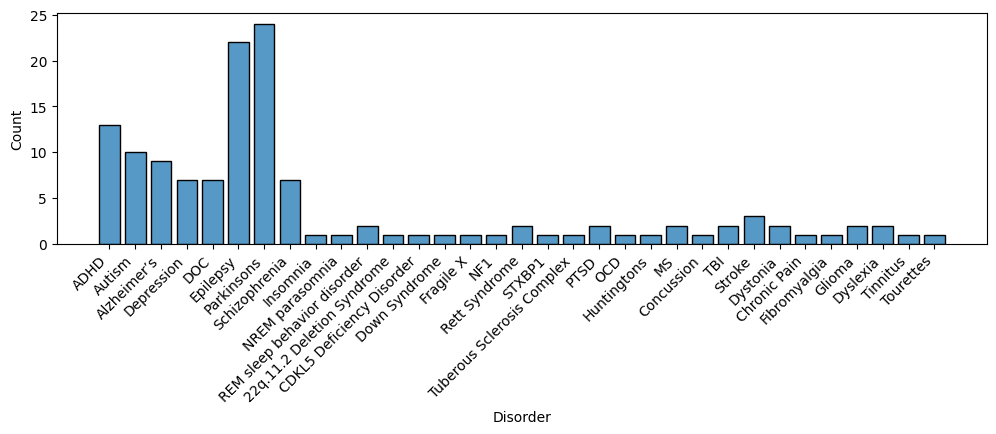

In [113]:
plot_hist(df, 'Disorder', figsize=(12, 3))

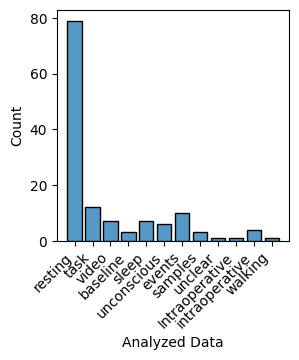

In [93]:
plot_hist(df, 'Analyzed Data')

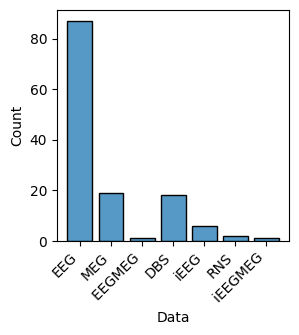

In [94]:
plot_hist(df, 'Data')

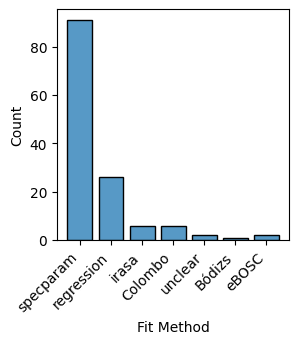

In [95]:
plot_hist(df, 'Fit Method')